***  EXTRACCION DE CARACTETISTICAS EIGEN  ***

Datos del Drive. 
1. Conexión y permisos con el drive personal

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Ubicación de las carpetas a utilizar

In [3]:
#%cd /content/gdrive/My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/
%cd /content/gdrive/My Drive/0_Desarrollo_Tesis/

/content/gdrive/.shortcut-targets-by-id/13aHaot6tbm7SROiS_JzQgfDtjZ_DM4PH/0_Desarrollo_Tesis


3. Listar la lista del contenido de la ruta

In [ ]:
!ls /content/gdrive/My\ Drive/0_Desarrollo_Tesis/*

***FUNCION HISTOGRAMA***


In [6]:
def histogram(imgGRAY):
    #histograma
    hist = cv.calcHist([imgGRAY],[0],None,[256],[0,256])
    # return the histogram
    return hist.flatten()

In [7]:
# CODIGO DE PRUEBAS

def funcion_prueba(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo):
  print("path_EXTRACCION"+path_EXTRACCION)
  print("path_REDIMENSIONADO"+path_REDIMENSIONADO)
  print("anexo_archivo"+anexo_archivo)

*** EIGEN ***

In [18]:
 # Import matplotlib library 
import matplotlib.pyplot as plt 
import numpy.linalg as linalg 
import numpy as np 
import cv2
import os


import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from skimage import io, color
import cv2 as cv


def extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO, anexo_archivo):

  path_redimensionadas=path_REDIMENSIONADO #Imagen redimensionada a color
  path_resultado=path_EXTRACCION  #Imagen Eigen

  #CREACION DE ARCHIVOS CSV CON LAS CARACTERISTICAS
  histograma_caracteristicas="5.Resultados_Histogramas/"+anexo_archivo+"/histograma_caracteristicas.csv"
  histograma_ruta_redimensionada="5.Resultados_Histogramas/"+anexo_archivo+"/histograma_ruta_redimensionada.csv"
  histograma_ruta_eigen="5.Resultados_Histogramas/"+anexo_archivo+"/histograma_ruta_eigen.csv"

  #Guarda la ruta de imagen REDIMENSIONADA
  archivo_ruta_redimensionada= open(histograma_ruta_redimensionada, "w+") 
  #Caracteristicas imagenes eigen a Histogramas
  archivo_histograma= open(histograma_caracteristicas, "w+") 

  #Array para apilar las imagenes
  files = [] #nombre de las imagenes
  path_files = [] #nombre de las carpetas por cantidad de imagenes
  path_database = [] #contiene la ruta de cada imagen

  array_imagenes =[] #matrices que representan cada imagen
  #####---------------------------

  #For que recorre las carpetas(sujetos) del path
  contador = 0
  for aa in os.listdir(path_redimensionadas):
    #For que recorre la imagen de cada carpeta(sujeto)
    for f in os.listdir(path_redimensionadas + '/' + aa):
      contador = contador + 1
      #aa Carpeta del sujeto 
      #f Nombre de la imagen del sujeto
      #Ruta de la imagen
      imgPath = path_redimensionadas + '/' + aa + '/' + f
      files.append(f)
      path_files.append(aa)
      path_database.append(imgPath)

      #Guarda la ruta de imagen REDIMENSIONADA
      archivo_ruta_redimensionada.write(imgPath)
      archivo_ruta_redimensionada.write("\n")

      #Abrir Imagen (Lee la imagen en formtado BGR)
      imgBGR = cv2.imread(imgPath)
      dim = (180, 180)
      #Se redimensiona la imagen de 180 por 180
      resizedBGR = cv2.resize(imgBGR, dim, interpolation = cv2.INTER_AREA) 

      #Se obtiene la información de las imagenes 
      height, width, channels = resizedBGR.shape

      #Convierte la imagen en RGB
      imgRGB = cv2.cvtColor(resizedBGR, cv2.COLOR_BGR2RGB)
      
      #Copiar imagen del formato RGB para luego convertirla en GRAY
      gray_image = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

      #Convertir de Matriz a Vector
      flat_arr = gray_image.ravel()
      #Convertir el vector a un array
      vector = np.array(flat_arr)
      #Se apila a el array
      array_imagenes.append(vector)

  # resul=is_empty(array_imagenes)

  # if (resul==False):
  if (len(array_imagenes)):

    # Se tiene una matriz de todas las imagenes
    matriz_imagenes=np.matrix(array_imagenes)

    #Matriz Promedio (Saca el promedio de todas las imagenes)
    matrix_avg = np.sum(matriz_imagenes,axis=0)/len(matriz_imagenes)

    #Matriz_imagenes - Matriz Promedio
    vec = matriz_imagenes - matrix_avg

    #--------------------------
    #Impresion de la matriz o cara promedio
    print("Cara Promedio")
    faceAverage = np.reshape(matrix_avg, (180, 180))
    plt.figure(figsize=(4, 4))
    plt.imshow(faceAverage,cmap='Greys')
    plt.title("Mean Face")
    #--------------------------


    A = np.matrix(vec)
    #print(A)

    #Matriz de Covarianza Reducida
    cov = A*np.transpose(A)


    #--------------------------
    #Se extraen los eigenValores y eigenVectores
    eigenValues, eigenVectors = linalg.eig(cov) 
    idx = eigenValues.argsort()[::-1] 
    eigenValues = eigenValues[idx] 
    eigenVectors = eigenVectors[:,idx] 
    #-------------------------
    #print(eigenVectors[0].shape)
    #print(vec.shape)

    #Numero de componentes principales
    k = 5  # Para buscar perro y gato
    #k = 25  #Gatos
    #k = 50 #Perros

    #Reconstrucción de imagenes originales por medio de eigenfaces aplicando PCA
    faces_pca = PCA(n_components=k)
    faces_pca.fit(matriz_imagenes)
    components = faces_pca.transform(matriz_imagenes)
    projected = faces_pca.inverse_transform(components)

    #Guarda la ruta de imagen EIGEN
    archivo_ruta_eigen= open(histograma_ruta_eigen, "w+") 

    #Exportacion de eigenfaces a carpeta
    for i,img in enumerate(projected):
      #Guarda imagenes imagenes con cuadros
      os.makedirs(path_resultado+ '/'+ path_files[i], exist_ok=True)
      filename=(path_resultado + '/' + path_files[i] + '/' + files[i]) 
      cv2.imwrite(filename, projected[i].reshape(180,180)) 

      #Guarda la ruta de imagen EIGEN
      archivo_ruta_eigen.write(filename)
      archivo_ruta_eigen.write("\n")

      #Abrir Imagen (Lee la imagen en formtado BGR)
      imgBGR = cv2.imread(filename)

      
      #Convierte la imagen en RGB
      imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
      
      #Copiar imagen del formato RGB para luego convertirla en GRAY
      gray_image = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)

      #Se obtiene la información de las imagenes 
      #height, width, channels = gray_image.shape

      
      
      
      #Histograma
      fv_hist = histogram(gray_image)
      i=0
      for b in fv_hist:
        i=i+1
        archivo_histograma.write("%.20f" % float(b))
        if(i<=(len(fv_hist)-1)):
          archivo_histograma.write(",")
      archivo_histograma.write("\n")
      
      
      
  else:
    print("Está vacía")



In [19]:
# Importar Librerias

import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, color
import cv2 as cv

In [20]:
def menu_tesis():
  print("----------- Tesis U Catolica -----------")
  print("----------- Seleccione la tecnica a implementar -----------")
  print("1. Eigen")
  print("-----------------------------------")

In [21]:
def menu_opcion():
  print("----------- Medidas de similaridad -----------")
  print("1. Perros")
  print("2. Buscar Perro")
  print("3. Gatos")
  print("4. Buscar Gato")
  print("5. Gatos QUERY")
  print("6. Perros QUERY")
  print("-----------------------------------")

In [22]:
def seleccion_menu():
  menu_tesis()
  mopcion = int(input("Seleccione una opcion: "))
  caso_menu(mopcion)

In [23]:
def seleccion_opcion(mopcion):
  menu_opcion()
  opcion = int(input("Seleccione una opcion: "))
  print(mopcion)
  print(opcion)
  caso_opcion(mopcion,opcion)

In [24]:
#def caso_opcion(self, mopcion,opcion):
class caso_opcion:
  def __init__(self, mopcion,opcion):
    #*****************
    #      EIGEN
    #*****************

    if mopcion== 1 and opcion == 1: #(1. Eigen, 1. Perros)
      print('1. Eigen, 1. Perros')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Perros' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Perros/ROSTRO_REDIMENSIONADO'#2

      anexo_archivo='Eigen_Perros'

      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))
      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)
      
    elif mopcion== 1 and opcion == 2: #(1. Eigen, 2. Buscar Perro)
      print('1. Eigen, 2. Buscar Perro')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Perros_Entrada' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Buscar_perro/ROSTRO_REDIMENSIONADO'#2

      anexo_archivo='Eigen_Perros_Entrada'

      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))
      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)

    elif mopcion== 1 and opcion == 3: #(1. Eigen, 3. Gatos)
      print('1. Eigen, 3. Gatos')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Gatos' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Gatos/ROSTRO_REDIMENSIONADO'#2

      anexo_archivo='Eigen_Gatos'
    
      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))

      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)

    elif mopcion== 1 and opcion == 4: #(1. Eigen, 4. Buscar Gato)
      print('1. Eigen, 4. Buscar Gato')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Gatos_Entrada' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Buscar_gato/ROSTRO_REDIMENSIONADO'#2

      anexo_archivo='Eigen_Gatos_Entrada'

      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))
      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)

      #extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO)
      #funcion_prueba(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)
      
    elif mopcion== 1 and opcion == 5: #(1. Eigen, 5. Gato QUERY)
      print('1. Eigen, 5. Gato QUERY')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Gatos_QUERY' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Gatos_QUERY/ROSTRO_REDIMENSIONADO'#2
  
      anexo_archivo='Eigen_Gatos_QUERY'

      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))
      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)
      
    elif mopcion== 1 and opcion == 6: #(1. Eigen, 6. Perros QUERY)
      print('1. Eigen, 6. Perros QUERY')
      path_EXTRACCION = '4.Resultados_ext_caracteristicas/Eigen_Perros_QUERY' #1
      path_REDIMENSIONADO='2.Resultados_Preprocesamiento/Perros_QUERY/ROSTRO_REDIMENSIONADO'#2
  
      anexo_archivo='Eigen_Perros_QUERY'

      print(os.path.isdir(path_EXTRACCION))
      print(os.path.isdir(path_REDIMENSIONADO))
      extraccion_imagen_eigen(path_EXTRACCION,path_REDIMENSIONADO,anexo_archivo)
      
    else:
      #seleccion_opcion()
      print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
      print('Error: La opción ingresada de BUSQUEDA no esta dentro de las opciones, por favor vuelva a ingresar la opción')
      print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
      print('')
      print('')
      print('')
      seleccion_opcion()
   
   
    

----------- Tesis U Catolica -----------
----------- Seleccione la tecnica a implementar -----------
1. Eigen
-----------------------------------
Seleccione una opcion: 1
Eigen
----------- Medidas de similaridad -----------
1. Perros
2. Buscar Perro
3. Gatos
4. Buscar Gato
5. Gatos QUERY
6. Perros QUERY
-----------------------------------
Seleccione una opcion: 5
1
5
1. Eigen, 5. Gato QUERY
True
True
Cara Promedio


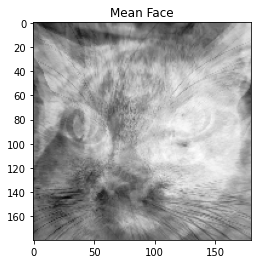

In [25]:
def caso_menu(mopcion):
  if mopcion == 1:
    print('Eigen')
    seleccion_opcion(mopcion)
  else:
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('Error: La opción ingresada no esta dentro de las opciones, por favor vuelva a ingresar la opción')
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    print('')
    print('')
    seleccion_menu()

seleccion_menu()